--- 
## Edureka: Data Science with Python - final project  
Student: Marcelo Machado

---  
### Importing packages

In [1]:
from EDA_v1 import *   # a personal package with many customized functions
%load_ext autoreload
%autoreload 2

In [17]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, KFold

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold, SelectKBest

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

---  
### Importing Data

In [3]:
df = pd.read_csv("./dataset/cars.csv")
df.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,0,2016,Honda,Honda Brio S MT,Brio,"425,000.00","9,680.00",Petrol,Mumbai,7,5.00
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,"325,000.00","119,120.00",Diesel,Mumbai,11,9.00
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,"2,650,000.00","64,593.00",Diesel,Thane,1,4.00
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-2019],E-Class,"4,195,000.00","25,000.00",Diesel,Mumbai,2,4.00
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,"475,000.00","23,800.00",Diesel,Mumbai,14,9.00


---  
### EDA

In [4]:
df_eda, num_cols, cat_cols, dat_cols = eda_read_df(df)
eda_overview(df_eda=df_eda, df=df)

Overview 
Rows: 1,725 		w/ some nan: 0 | 0.00%
			Max nan column: Id | 0 | 0.00%
			Cols more than 30% nan: 0  |  []
			Cols up to 5% nan: 0  |  []
			It represents: 0 | 0.00%
			Duplicates: 0 | 0.00%

Features: 11 		Num_cols: 6 		Cat_cols: 5 		Dat_cols: 0
			w/ Nan: 0 		w/ Special char: 4
			w/ Outlier: 5 		w/ Max classes: 750
			w/ Negative: 0 		w/ Min classes: 5
			Normaltest: 0 (scipy)

Possible bool columns defined as numerical:
			[]

Numerical Features 


,col,dtype,nan_#,nan_%,outliers,zero,negative,positive,stdev,mean,median,mode,min,perc_25,perc_75,max,range,p_normal
0,Id,int64,0,0.00,0,1,0,1724,498.11,862.00,862.00,0,0.00,431.00,"1,293.00","1,724.00","1,724.00",0.00
9,brand_rank,int64,0,0.00,10,0,0,1725,12.95,15.73,14.00,14,1.00,5.00,24.00,81.00,80.00,0.00
10,car_age,float64,0,0.00,11,21,0,1704,3.21,5.61,5.00,3.00,0.00,3.00,8.00,31.00,31.00,0.00
6,distance_travelled(kms),float64,0,0.00,41,0,0,1725,"44,725.54","53,848.26","49,000.00","55,000.00",350.00,"29,000.00","70,500.00","790,000.00","789,650.00",0.00
5,price,float64,0,0.00,158,0,0,1725,"1,671,657.73","1,494,837.39","875,000.00","750,000.00","62,500.00","545,000.00","1,825,000.00","14,700,000.00","14,637,500.00",0.00
1,year,int64,0,0.00,11,0,0,1725,3.21,"2,015.39","2,016.00",2018,"1,990.00","2,013.00","2,018.00","2,021.00",31.00,0.00



Categorical Features 


,col,dtype,nan_#,nan_%,special_char,classes,top3_classes
2,brand,object,0,0.00,132,31,42.03% > Hyundai 17.22% | Maruti Suzuki 15.94% | Honda 8.87%
8,city,object,0,0.00,0,15,57.22% > Chennai 28.58% | Bangalore 14.32% | Pune 14.32%
7,fuel_type,object,0,0.00,14,5,99.59% > Diesel 53.45% | Petrol 45.68% | CNG + 1 0.46%
3,full_model_name,object,0,0.00,1154,750,1.97% > Ford EcoSport Titanium 1.5L TDCi 0.70% | Toyota Innova Crysta 2.4 VX 8 STR [2016-2020] 0.64% | Audi Q7 3.0 TDI quattro Premium Plus 0.64%
4,model_name,object,0,0.00,133,169,12.06% > Creta 4.12% | Innova 4.00% | City 3.94%



Date Features 


,col,dtype,nan_#,nan_%,median,mode,min,max,range,classes,top3_classes


In [ ]:
# Analysis ---------------------------------------------------------------------------------- 

# num cols comments --------------------------------------------------------------
# we can drop Id column
# car_age with zero means that's a new car?
#      all zero car_age have the same year?
# transform year to int
# transfrom car_age to int
# check correlation
# check outliers
# remember to apply a normalization in pipeline

# cat cols comments --------------------------------------------------------------
# check special chars ... is it ok or it's messing up the data
# check if we can group some brand into "others" 
# too many classes ... once we decide to keep only brand, we can drop full name
# too many classes ... once we decide to keep only brand, we can drop model_name

In [5]:
# car_age with zero means that's a new car?
#      all zero car_age have the same year?  = YES!
df[df["car_age"]==0]["year"].value_counts()

2021    21
Name: year, dtype: int64

In [5]:
# we can drop Id column
# too many classes ... once we decide to keep only brand, we can drop full name
# too many classes ... once we decide to keep only brand, we can drop model_name
df_transf = df.drop(columns=["Id", "full_model_name", "model_name"])

In [7]:
df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1725 non-null   int64  
 1   brand                    1725 non-null   object 
 2   price                    1725 non-null   float64
 3   distance_travelled(kms)  1725 non-null   float64
 4   fuel_type                1725 non-null   object 
 5   city                     1725 non-null   object 
 6   brand_rank               1725 non-null   int64  
 7   car_age                  1725 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 107.9+ KB


In [6]:
# transfrom car_age to int
df_transf['car_age'] = df_transf['car_age'].astype(int)

Numerical Features Charts 
Lines: 
Mean = gray - 	Median = black : 	Mode = Yellow --


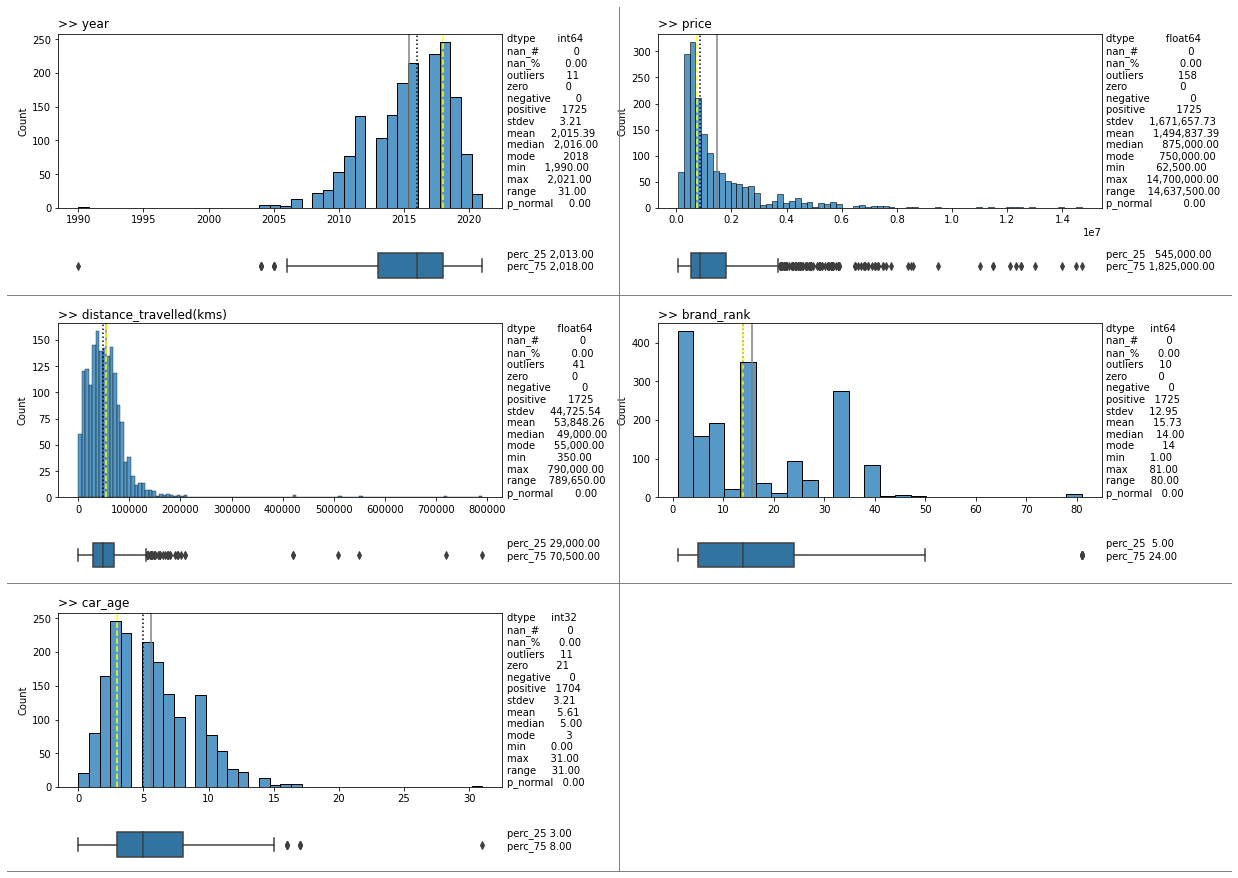

In [9]:
# check outliers
df_transf_eda, num_transf_cols, cat_transf_cols, dat_cols = eda_read_df(df_transf)
eda_num_charts(df_eda=df_transf_eda, df=df_transf, num_cols=num_transf_cols)

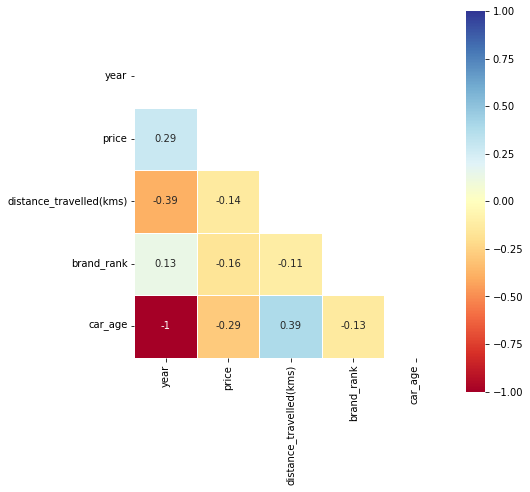

In [10]:
# correlation plot between all num_cols -----------------------------------------------------------------------------
df_corr = df_transf[num_transf_cols]

mask = np.triu(np.ones_like(df_corr.corr(), dtype=bool))

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(df_corr.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0,
            cmap= 'RdYlBu', square=True, linewidths=.5, mask=mask);

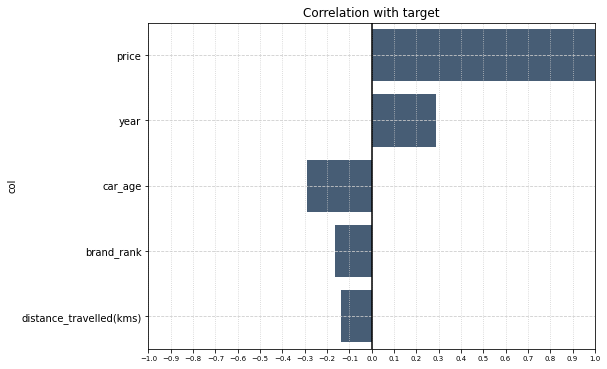

In [11]:
# correlation plot with target --------------------------------------------------------------------------------------
cor = df_transf[num_transf_cols].corrwith(df_transf.price).reset_index().rename(columns={'index':'col', 0:'corr'})
cor.sort_values(by='corr', key=abs, ascending=False, inplace=True)

plt.figure(figsize=(8,6))
sns.barplot(data=cor, y='col', x='corr', color='#3F5D7D').set(xlabel='')
plt.xlim([-1,1])
plt.title(f'Correlation with target')
plt.xticks(np.arange(-1, 1.01, step=0.1), fontsize=7)
plt.grid(True, axis='y', color='#CCCCCC', linestyle='--')
plt.grid(True, axis='x', color='#CCCCCC', linestyle=':')
plt.axvline(x=0, color='k');

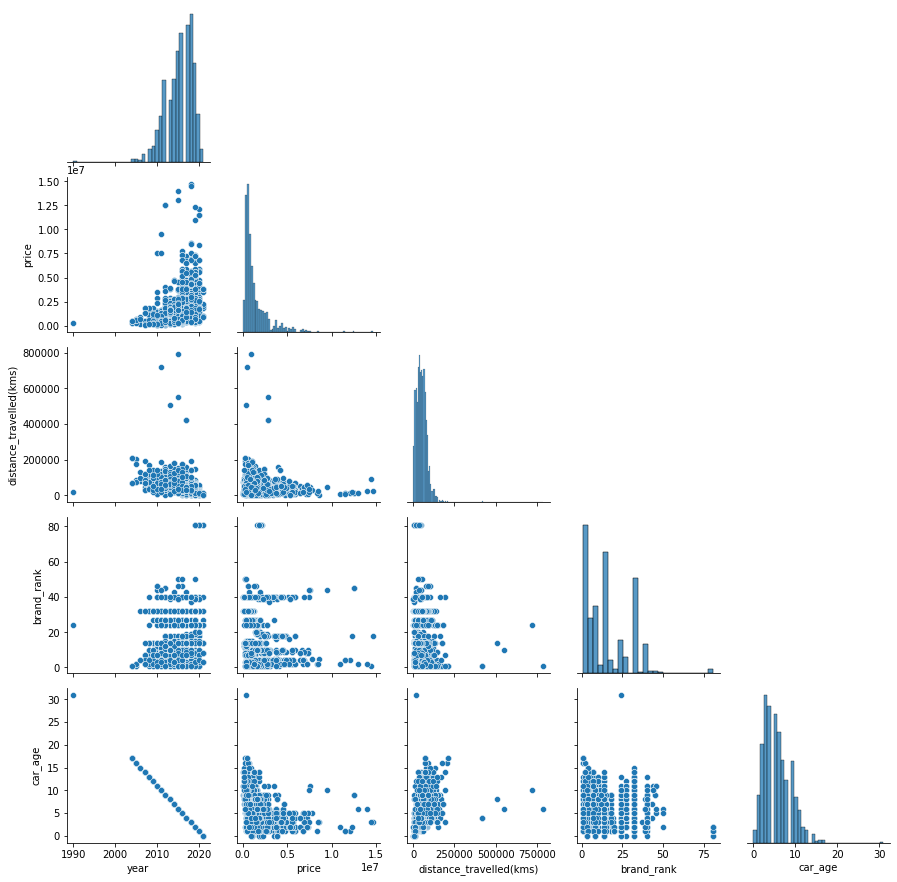

In [12]:
# Exploring relationships between features
g = sns.PairGrid(df_transf, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)

No handles with labels found to put in legend.


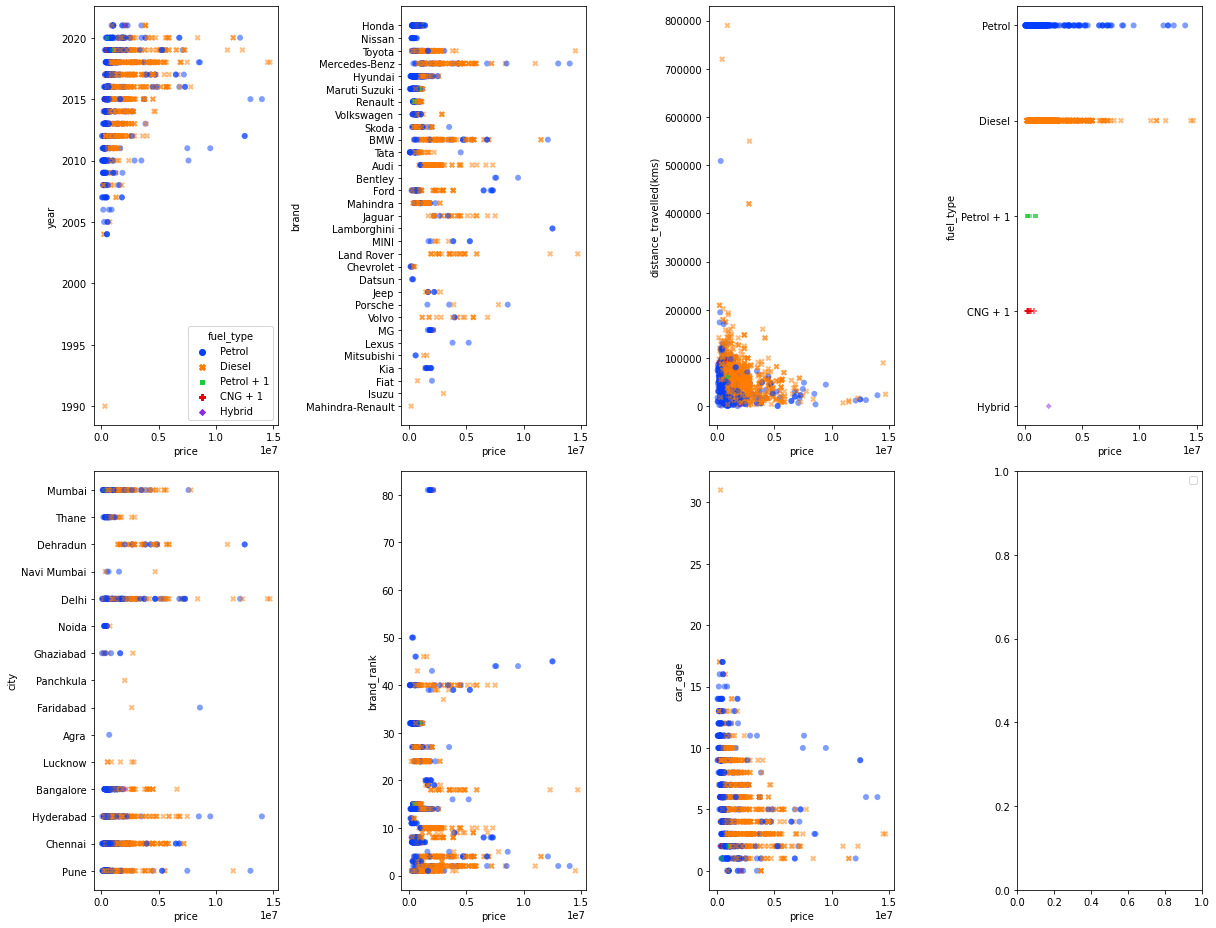

In [13]:
# Exploring relationships between price and other features
x = 'price'
hue = 'fuel_type'
#markers = {0: ".", 1: "o"}
#palette = ["gray", "k"]

names = [coluna for coluna in df_transf if coluna != x ]

f, axes = plt.subplots(math.ceil(len(names)/4), 4, figsize=(17,13)) 
y=0

for name in names:
    i, j = divmod(y, 4)
    sns.scatterplot(  y=name, x= x, data=df_transf, ax=axes[i, j], hue=hue, style=hue, palette='bright', linewidth=0, alpha=0.5)
    if (not i==0)+(not j==0):
        axes[i, j].legend([],[], frameon=False) # take off legend
    y+=1

plt.legend()
plt.tight_layout()
plt.show()

Categorical Features Charts 


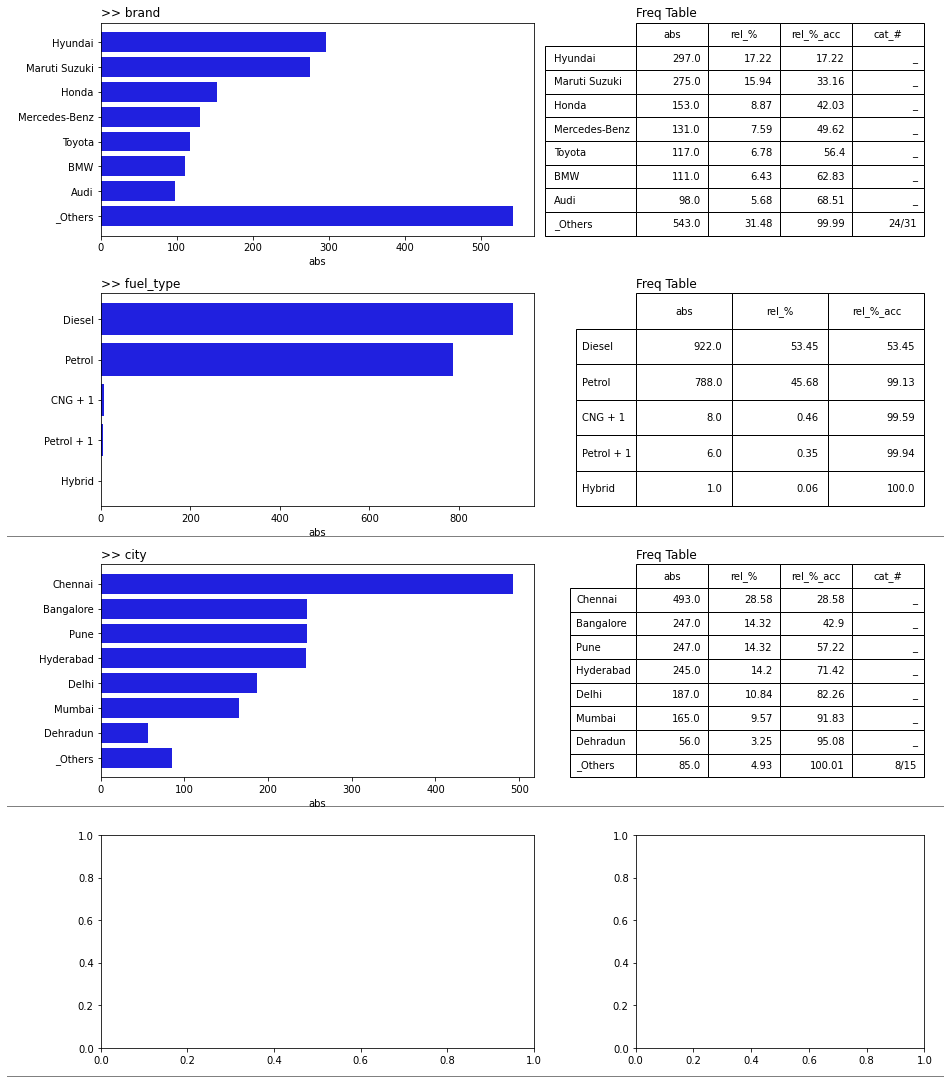

In [14]:
eda_cat_charts(df=df_transf, cat_cols=cat_transf_cols, n=7)

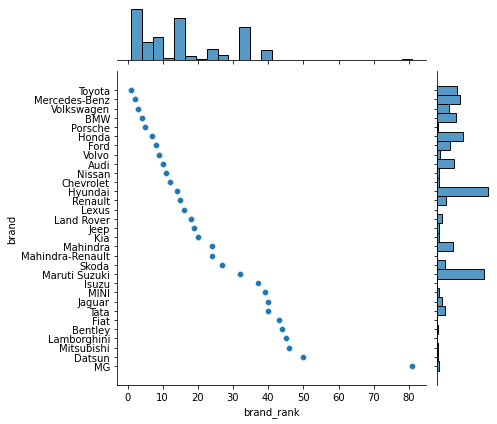

In [15]:
sns.jointplot(data=df_transf.sort_values(by="brand_rank"), x="brand_rank", y="brand")

In [16]:
# fuel type too unbalanced
# we can drop year due to high correlation with car_age
# we can drop city
# we can drop brand and keep only brand_rank

In [7]:
df_transf2 = df_transf.drop(columns=['city', 'year', 'brand'])
df_transf2.rename(columns={"distance_travelled(kms)":"kms"}, inplace=True)
df_transf2.head()

,price,kms,fuel_type,brand_rank,car_age
0,"425,000.00","9,680.00",Petrol,7,5
1,"325,000.00","119,120.00",Diesel,11,9
2,"2,650,000.00","64,593.00",Diesel,1,4
3,"4,195,000.00","25,000.00",Diesel,2,4
4,"475,000.00","23,800.00",Diesel,14,9


---  
### Building Models

In [8]:
# let's try 2 different approach ------------------------------------------------------------------------
# 1) using all columns dataframe but Id and full_model_name
# 2) using reduced cols dataframe

# 1 ----------------------------------------------------------------------------------------------------
_, num_cols_df, cat_cols_df, _ = eda_read_df(df.drop(columns=["Id", "full_model_name", "price"]).rename(columns={"distance_travelled(kms)":"kms"}))
# 2 ----------------------------------------------------------------------------------------------------
_, num_cols_transf, cat_cols_transf, _ = eda_read_df(df_transf2.drop(columns=["price"]))

In [9]:
# 1 ----------------------------------------------------------------------------------------------------
Xdf = df.drop(columns = ["price", "Id", "full_model_name"]).rename(columns={"distance_travelled(kms)":"kms"})
ydf = df["price"]
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(Xdf, ydf, test_size = 0.2, random_state = 42)

# 2 ----------------------------------------------------------------------------------------------------
Xtransf = df_transf2.drop(columns = ["price"])
ytransf = df_transf2["price"]
X_train_transf, X_test_transf, y_train_transf, y_test_transf = train_test_split(Xtransf, ytransf, test_size = 0.2, random_state = 42)

In [10]:
# once we have 2 diff approachs, let's create 2 diff preprocessing pipes

# this part is the same for both ----------------------------------------------------------------------
cat_pipe = Pipeline([
    ('ohe', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'))
])
num_pipe = Pipeline([
    ('scaler', StandardScaler())    
])

# 1 ----------------------------------------------------------------------------------------------------
preprocessor_df = ColumnTransformer([
    ('cat_prep', cat_pipe, cat_cols_df),
    ('num_prep', num_pipe, num_cols_df)
])

# 2 ----------------------------------------------------------------------------------------------------
preprocessor_transf = ColumnTransformer([
    ('cat_prep', cat_pipe, cat_cols_transf),
    ('num_prep', num_pipe, num_cols_transf)
])

In [11]:
# let's create diff models pipeline

# this part is the same for both ----------------------------------------------------------------------
gscv = KFold(n_splits=10, shuffle=True)
score = ['neg_mean_squared_error', 'neg_mean_absolute_percentage_error', 'r2']
rft = 'r2'

# 1 ----------------------------------------------------------------------------------------------------
models_df = {
    'linear':  GridSearchCV(
        Pipeline([
            ('preprocessor', preprocessor_df),
            ('selector', VarianceThreshold()),
            ('lr', LinearRegression())]), 
        param_grid={
        },
        scoring=score,
        #error_score='raise',
        refit=rft,
        cv=gscv),

    'elastic':  GridSearchCV(
        Pipeline([
            ('preprocessor', preprocessor_df),
            ('selector', SelectKBest()),
            ('en', ElasticNet())]), 
        param_grid={
            'en__alpha': [0.5, 1],
            'en__l1_ratio': [0.3, 0.7],
            'en__max_iter': [1000],
        },
        scoring=score,
        refit=rft,
        cv=gscv),

    'randomforest':  GridSearchCV(
        Pipeline([
            ('preprocessor', preprocessor_df),
            ('selector', VarianceThreshold()),
            ('rf', RandomForestRegressor())]), 
        param_grid={
            'rf__n_estimators': [100, 250],
            'rf__max_features': ['auto'],
            'rf__max_depth': [3, 7],
            'rf__criterion': ['squared_error'],
            'rf__min_samples_split' : [2,3]
        },
        scoring=score,
        refit=rft,
        cv=gscv),
        
    'svm_reg': GridSearchCV(
        Pipeline([
            ('preprocessor', preprocessor_df),
            ('selector', SelectKBest()),
            ('svm', LinearSVR())]), 
        param_grid={
            'svm__C': [1.0, 5.0],
            'svm__loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
            'svm__max_iter': [1000],
        },
        scoring=score,
        refit=rft,
        cv=gscv),
    
    'xgboost': GridSearchCV(
        Pipeline([
            ('preprocessor', preprocessor_df),
            ('selector', VarianceThreshold()),
            ('xgb', XGBRegressor())]), 
        param_grid={
            'xgb__gamma': [0.5, 2],
            'xgb__max_depth': [3],
            'xgb__booster': ["gbtree"],
            "xgb__eta": [0.03],
            "xgb__alpha": [50],
            "xgb__lambda": [0, 1],
            "xgb__n_estimators": [170]
        },
        scoring=score,
        refit=rft,
        cv=gscv),
}

# 2 ----------------------------------------------------------------------------------------------------
models_transf = {
    'linear':  GridSearchCV(
        Pipeline([
            ('preprocessor', preprocessor_transf),
            ('lr', LinearRegression())]), 
        param_grid={
        },
        scoring=score,
        #error_score='raise',
        refit=rft,
        cv=gscv),

    'elastic':  GridSearchCV(
        Pipeline([
            ('preprocessor', preprocessor_transf),
            ('en', ElasticNet())]), 
        param_grid={
            'en__alpha': [0.5, 1],
            'en__l1_ratio': [0.3, 0.7],
            'en__max_iter': [1000],
        },
        scoring=score,
        refit=rft,
        cv=gscv),

    'randomforest':  GridSearchCV(
        Pipeline([
            ('preprocessor', preprocessor_transf),
            ('rf', RandomForestRegressor())]), 
        param_grid={
            'rf__n_estimators': [100, 250],
            'rf__max_features': ['auto'],
            'rf__max_depth': [3, 7],
            'rf__criterion': ['squared_error'],
            'rf__min_samples_split' : [2,3]
        },
        scoring=score,
        refit=rft,
        cv=gscv),
        
    'svm_reg': GridSearchCV(
        Pipeline([
            ('preprocessor', preprocessor_transf),
            ('svm', LinearSVR())]), 
        param_grid={
            'svm__C': [1.0, 5.0],
            'svm__loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
            'svm__max_iter': [1000],
        },
        scoring=score,
        refit=rft,
        cv=gscv),
    
    'xgboost': GridSearchCV(
        Pipeline([
            ('preprocessor', preprocessor_transf),
            ('xgb', XGBRegressor())]), 
        param_grid={
            'xgb__gamma': [0.5, 2],
            'xgb__max_depth': [3],
            'xgb__booster': ["gbtree"],
            "xgb__eta": [0.03],
            "xgb__alpha": [50],
            "xgb__lambda": [0, 1],
            "xgb__n_estimators": [170]
        },
        scoring=score,
        refit=rft,
        cv=gscv),
}


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
# 1 ----------------------------------------------------------------------------------------------------
results_df, best_model_fitted_df = run_models_get_results(models=models_df, X_train=X_train_df, y_train=y_train_df)

Treinando: linear
	linear treinado: 	 Duração: 0:00:01.633257
Treinando: elastic
	elastic treinado: 	 Duração: 0:00:04.073851
Treinando: randomforest
	randomforest treinado: 	 Duração: 0:02:15.504360
Treinando: svm_reg
	svm_reg treinado: 	 Duração: 0:00:02.674674
Treinando: xgboost
	xgboost treinado: 	 Duração: 0:00:54.827252

Tempo total: 0:03:18.713394


In [14]:
# 2 ----------------------------------------------------------------------------------------------------
results_transf, best_model_fitted_transf = run_models_get_results(models=models_transf, X_train=X_train_transf, y_train=y_train_transf)

Treinando: linear
	linear treinado: 	 Duração: 0:00:00.322697
Treinando: elastic
	elastic treinado: 	 Duração: 0:00:00.664909
Treinando: randomforest
	randomforest treinado: 	 Duração: 0:00:32.419556
Treinando: svm_reg
	svm_reg treinado: 	 Duração: 0:00:01.898622
Treinando: xgboost
	xgboost treinado: 	 Duração: 0:00:14.654112

Tempo total: 0:00:49.959896


---  
### Comparing Models

In [27]:
# 1 ----------------------------------------------------------------------------------------------------
mean_test_each_score_df = get_mean_test_each_score(results_df, score)
mean_test_each_score_df = pd.DataFrame.from_dict(mean_test_each_score_df).T
mean_test_each_score_df.columns = models_df.keys()
mean_test_each_score_df = mean_test_each_score_df.reset_index().rename(columns={'index':'score'})
mean_test_each_score_df

,score,linear,elastic,randomforest,svm_reg,xgboost
0,mean_test_neg_mean_squared_error,"-22,312,029,862,554,214,261,455,317,666,627,584.00","-2,647,299,126,951.69","-962,942,121,959.44","-2,348,810,764,565.52","-936,277,631,618.73"
1,mean_test_neg_mean_absolute_percentage_error,"-23,532,899,153.38",-1.34,-0.63,-1.23,-0.55
2,mean_test_r2,"-7,875,321,652,492,443,320,320.00",-0.01,0.63,0.11,0.65


In [21]:
# 2 ----------------------------------------------------------------------------------------------------
mean_test_each_score_tranf = get_mean_test_each_score(results_transf, score)
mean_test_each_score_tranf = pd.DataFrame.from_dict(mean_test_each_score_tranf).T
mean_test_each_score_tranf.columns = models_transf.keys()
mean_test_each_score_tranf

,linear,elastic,randomforest,svm_reg,xgboost
mean_test_neg_mean_squared_error,"-2,209,128,159,670.57","-2,309,313,808,352.20","-1,133,233,512,138.19","-2,218,423,350,327.71","-1,192,600,700,406.61"
mean_test_neg_mean_absolute_percentage_error,-0.88,-1.03,-0.50,-0.89,-0.56
mean_test_r2,0.18,0.13,0.59,0.17,0.56


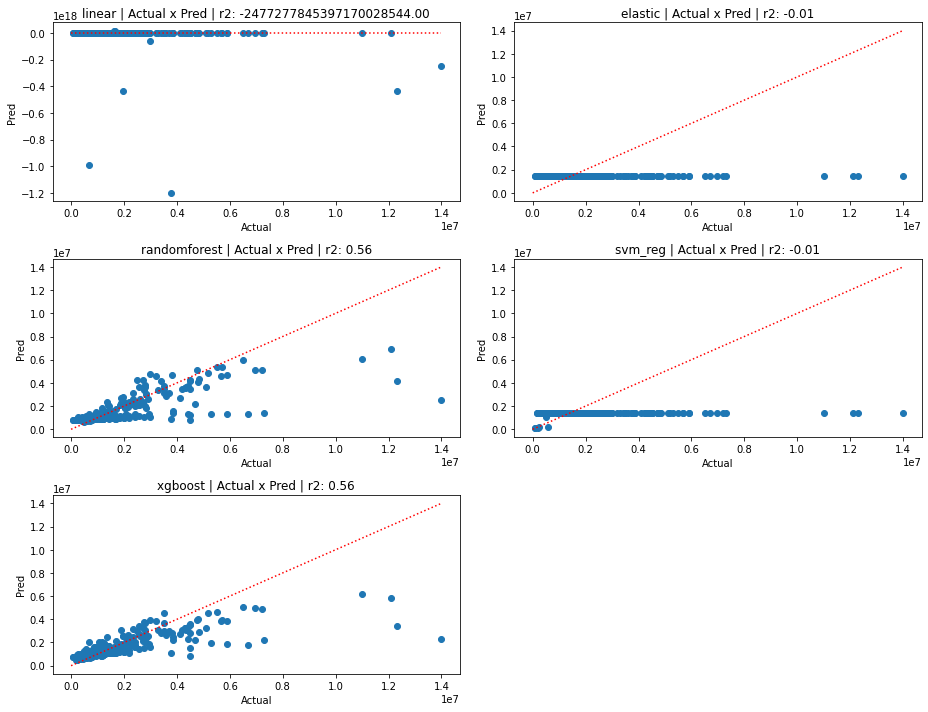

In [71]:
# 1 ----------------------------------------------------------------------------------------------------
pred_and_plot_regression(X_test = X_test_df, 
                        y_test = y_test_df, 
                        models = models_df, 
                        best_model_fitted = best_model_fitted_df)

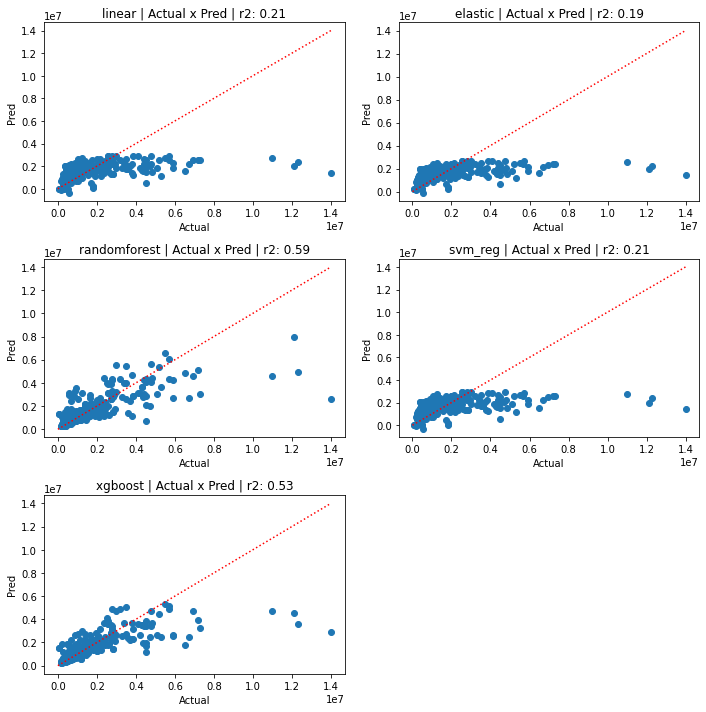

In [18]:
# 2 ----------------------------------------------------------------------------------------------------
pred_and_plot_regression(X_test = X_test_transf, 
                        y_test = y_test_transf, 
                        models = models_transf, 
                        best_model_fitted = best_model_fitted_transf)

In [25]:
# The best r2 score is:
#   model: Random Forest 
#   dataframe: reduced cols dataframe

# ...and it's not overfited
# train score
train_score = mean_test_each_score_tranf.loc['mean_test_r2', 'randomforest']

estimator = best_model_fitted_transf['randomforest']
y_pred = estimator.predict(X_test_transf)
r2= r2_score(y_test_transf, y_pred)
print(f"Train r2: {train_score:.4f}")
print(f"Test r2: {r2:.4f}")

Train r2: 0.5851
Test r2: 0.5867


---  
### Feature importance

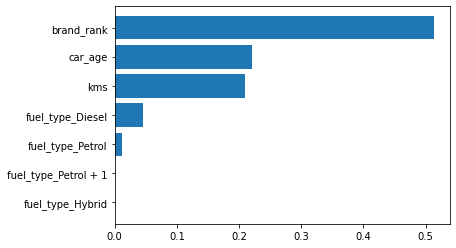

In [107]:
# getting the features rank importance in the selected model 

model = best_model_fitted_transf["randomforest"]
cols = model[0].get_feature_names_out().tolist()
cols = [ s.replace('num_prep__', '').replace('cat_prep__', '') for s in cols]
importances = model[1].feature_importances_

params_df = pd.DataFrame({'features':cols, 'values':importances}).sort_values(by='values', ascending=True)
plt.barh(params_df['features'], params_df['values'])
plt.show()